In [29]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  


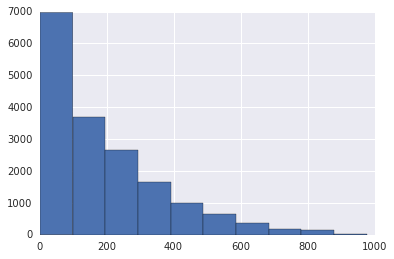

In [30]:
data = pd.read_csv("bike_rental_hour.csv")
print(data.head(3))

data['cnt'].hist()

In [31]:
data.corr().abs()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,0.004775,0.014723,0.001357,0.003416,0.014198,0.136178,0.137615,0.009577,0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,0.010742,0.830386,0.006117,0.009585,0.002335,0.013743,0.014524,0.312025,0.319380,0.150625,0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.010742,1.000000,0.010473,0.003867,0.006692,0.004485,0.002196,0.019157,0.040913,0.039222,0.083546,0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,0.010473,1.000000,0.005772,0.018430,0.010400,0.003477,0.005400,0.201691,0.208096,0.164411,0.135386,0.068457,0.122273,0.120638
hr,0.004775,0.006117,0.003867,0.005772,1.000000,0.000479,0.003498,0.002285,0.020203,0.137603,0.133750,0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.009585,0.006692,0.018430,0.000479,1.000000,0.102088,0.252471,0.017036,0.027340,0.030973,0.010588,0.003988,0.031564,0.047345,0.030927
weekday,0.001357,0.002335,0.004485,0.010400,0.003498,0.102088,1.000000,0.035955,0.003311,0.001795,0.008821,0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.003416,0.013743,0.002196,0.003477,0.002285,0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,0.011830,0.300942,0.134326,0.030284
weathersit,0.014198,0.014524,0.019157,0.005400,0.020203,0.017036,0.003311,0.044672,1.000000,0.102640,0.105563,0.418130,0.026226,0.152628,0.120966,0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,0.027340,0.001795,0.055390,0.102640,1.000000,0.987672,0.069881,0.023125,0.459616,0.335361,0.404772


In [48]:
def assign_label(row):
    if 6 <= row <= 12:
        return 1
    elif 12 < row <= 18:
        return 2
    elif 18 < row <= 24:
        return 3
    elif 0 < row <= 6:
        return 4

data['time_label'] = data["hr"].apply(assign_label)
print(data['time_label'].head(10))

0    0
1    4
2    4
3    4
4    4
5    4
6    1
7    1
8    1
9    1
Name: time_label, dtype: int64


In [49]:
print(data['cnt'].head(10))
len(data['cnt'].value_counts())

0    16
1    40
2    32
3    13
4     1
5     1
6     2
7     3
8     8
9    14
Name: cnt, dtype: int64


869

For regression problems in Random Forest roc_auc_score is the best metric to pick up.  
  
As for validation, I'd choose KFold cross-validation, for me it's the best validation for now,   
plus we have a lot of unique data in data['cnt'].  
  
Split dataset into 5-10 folds would be a good approach to lower error.

In [34]:
train_len = int((data.shape[0]/100) * 80)
train = data.sample(n=train_len,random_state=1)
test = data[~data.index.isin(train.index)]
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
14,15,2011-01-01,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106,2
15,16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110,2
18,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,9,26,35,2
20,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36,3


In [35]:
features = ['holiday', 'weathersit', 'atemp', 'season']
target = 'cnt'

model = LinearRegression()
model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = np.sqrt(mean_squared_error(predictions,test[target]))

print(predictions)
print(rmse)

[114.67391006 150.76795184 144.8398762  ...  61.57200574  73.46741581
 108.70657564]
162.1057675191572


In [36]:
features = ['holiday', 'weathersit', 'atemp', 'season', 'temp', 'windspeed', 'mnth', 'hr']
target = 'cnt'

model = LinearRegression()
model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = np.sqrt(mean_squared_error(predictions,test[target]))

print(predictions)
print(rmse)

[-14.40475386 176.4113686  181.33519088 ...  53.18369908 108.77108351
 186.22902935]
148.91283366752353


As we can see first model lack of wind, month, hour data. This is actual crutial for bicycle traveling.   
I'll go forward and run another test. Every time I'll popout last feature and see how rmse moves.   

In [37]:

features = ['holiday', 'weathersit', 'atemp', 'season', 'temp', 'windspeed', 'mnth', 'hr']
target = 'cnt'

prediction_list = list()
rmse_list = list()
popped_out = list()

for _ in range(5):
    popped_out.append(features.pop())
    model = LinearRegression()
    model.fit(train[features], train[target])
    predictions = model.predict(test[features])
    prediction_list.append(predictions)
    rmse_list.append(np.sqrt(mean_squared_error(predictions,test[target])))

for i in range(len(rmse_list)):
    print("removed feature: ", popped_out[i])
    print(prediction_list[i])
    print("rmse: ", rmse_list[i])
    print(" ")

removed feature:  hr
[ 65.9471996  161.99501916 158.31650737 ...  51.73997063  64.82958781
  86.57055449]
rmse:  161.0000014845404
 
removed feature:  mnth
[ 64.97278021 161.14434103 157.45781187 ...  56.62283635  69.7332882
  91.50586032]
rmse:  160.99188129535156
 
removed feature:  windspeed
[ 96.52991689 145.48818193 138.35853102 ...  60.70984118  74.96745283
 104.17168396]
rmse:  161.8758047150695
 
removed feature:  temp
[114.67391006 150.76795184 144.8398762  ...  61.57200574  73.46741581
 108.70657564]
rmse:  162.1057675191572
 
removed feature:  season
[125.34186216 165.08587915 158.85331353 ...  71.30846791  83.81487442
 119.06802127]
rmse:  162.34942876048686
 


In [38]:
import random

features = ['holiday', 'weathersit', 'atemp', 'season', 'temp', 'windspeed', 'mnth', 'hr']
target = 'cnt'

prediction_list = list()
rmse_list = list()
popped_out = list()

random.seed(10)

for _ in range(5):
    popped_out.append(features.pop(random.randrange(len(features))))
    model = LinearRegression()
    model.fit(train[features], train[target])
    predictions = model.predict(test[features])
    prediction_list.append(predictions)
    rmse_list.append(np.sqrt(mean_squared_error(predictions,test[target])))

for i in range(len(rmse_list)):
    print("removed feature: ", popped_out[i])
    print(prediction_list[i])
    print("rmse: ", rmse_list[i])
    print(" ")

removed feature:  holiday
[-15.00300842 175.96894531 180.88995524 ...  51.28540422 106.86852771
 184.2312869 ]
rmse:  148.9404063307354
 
removed feature:  temp
[ -8.73661743 179.18022012 184.81769434 ...  51.29587594 105.79490277
 185.41885553]
rmse:  149.02416537447843
 
removed feature:  windspeed
[ 15.40330931 171.41744126 175.5073759  ...  52.80440807 108.87140879
 197.49246602]
rmse:  149.40558041843502
 
removed feature:  hr
[115.42007437 151.65429604 145.73043344 ...  52.25049504  64.13745111
  99.18573499]
rmse:  162.13057549382114
 
removed feature:  weathersit
[101.39725732 168.86406084 162.74912247 ...  64.29989603  76.57026906
  82.68520743]
rmse:  163.12805027079247
 


In [39]:
import random

features = ['holiday', 'weathersit', 'atemp', 'season', 'temp', 'windspeed', 'mnth', 'hr']
target = 'cnt'

prediction_list = list()
rmse_list = list()
popped_out = list()

random.seed(5)

for _ in range(5):
    popped_out.append(features.pop(random.randrange(len(features))))
    model = LinearRegression()
    model.fit(train[features], train[target])
    predictions = model.predict(test[features])
    prediction_list.append(predictions)
    rmse_list.append(np.sqrt(mean_squared_error(predictions,test[target])))

for i in range(len(rmse_list)):
    print("removed feature: ", popped_out[i])
    print(prediction_list[i])
    print("rmse: ", rmse_list[i])
    print(" ")

removed feature:  temp
[ -8.04508983 179.66714651 185.31968862 ...  53.14829714 107.6328342
 187.38855869]
rmse:  148.99929704256064
 
removed feature:  mnth
[ -9.86322878 178.03184848 183.66697145 ...  62.55027562 117.05094337
 196.84738619]
rmse:  148.99924273796816
 
removed feature:  atemp
[ 23.08315186 157.04074657 168.76133328 ... 116.67136193 166.63358223
 258.49340163]
rmse:  158.35452076833892
 
removed feature:  hr
[123.16590886 137.60678234 140.55289027 ... 119.89058964 119.89058964
 149.72042537]
rmse:  173.1365373095749
 
removed feature:  holiday
[121.99135979 136.54105518 139.48437663 ... 118.84161883 118.84161883
 148.52076049]
rmse:  173.16835560949988
 


It looks like that the second model does the best results.  
Even removing 'holiday' dosen't  effect much. Best rmse ~ 148.91

In [66]:
features = ['holiday', 'weathersit', 'atemp', 'season', 'temp', 'windspeed', 'mnth', 'hr']
target = 'cnt'

# leaves = [2,4,6,8]
# leaves = [2,4,6,7,8,9,10,11,12]
leaves = list(range(1,26))

pr_list = list()
rmse_list = list()

for i in leaves:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(train[features], train[target])
    predictions = np.rint(model.predict(test[features]))
    pr_list.append(predictions)
    rmse_list.append(np.sqrt(mean_squared_error(test[target],predictions)))

for i in range(len(leaves)):
    print("leaves:", leaves[i])
    print(pr_list[i])
    print("rmse:", rmse_list[i])
    print(" ")

leaves: 1
[ 33.  94.  94. ...  90. 203.  58.]
rmse: 139.33860497164108
 
leaves: 2
[ 33. 126. 167. ...  73. 214.  28.]
rmse: 129.0563509270834
 
leaves: 3
[ 33. 163. 300. ...  73. 139.  28.]
rmse: 121.65837915981318
 
leaves: 4
[ 25. 178. 239. ...  66. 156.  35.]
rmse: 115.8669763739398
 
leaves: 5
[ 25. 163. 267. ...  66. 156.  64.]
rmse: 112.7202191870599
 
leaves: 6
[ 25. 200. 267. ...  66. 166.  58.]
rmse: 111.69189754402528
 
leaves: 7
[ 29. 200. 267. ...  59. 166.  60.]
rmse: 110.10356433454578
 
leaves: 8
[ 29. 239. 239. ...  59. 166.  54.]
rmse: 107.5770871947091
 
leaves: 9
[ 29. 239. 239. ...  59. 166.  59.]
rmse: 107.81975486756036
 
leaves: 10
[ 29. 239. 239. ...  59. 166.  55.]
rmse: 108.10634122315965
 
leaves: 11
[ 34. 191. 225. ...  59. 132.  55.]
rmse: 107.00040464309451
 
leaves: 12
[ 34. 223. 223. ...  59. 153.  55.]
rmse: 106.69234158898159
 
leaves: 13
[ 34. 208. 208. ...  73. 153.  55.]
rmse: 106.7306170974707
 
leaves: 14
[ 34. 177. 210. ...  73. 132.  56.]
rmse:

Best rmse result with 8 leaves in tree.   
I've added aditional near to 8 leaves(7,9,11) to make sure in my    suggestions.   
If we look at the second predictions in all leaves we can see   how it greatly varrites then rmse varites ~1-2 points.  

In [67]:
print("min rmse: ", min(rmse_list))
print("samples of leaves: ", leaves[rmse_list.index(min(rmse_list))])

min rmse:  104.4035693520137
samples of leaves:  19


After I've mention that after 11 leaves rmse decreases.  
I've studied with 25 range to make sure that I've mistaken.  
Now best result with 19 samples of leaves

In [68]:
features = ['holiday', 'weathersit', 'atemp', 'season', 'temp', 'windspeed', 'mnth', 'hr']
target = 'cnt'

leaves = list(range(1,26))
pr_list = list()
rmse_list = list()

for i in leaves:
    model = RandomForestRegressor(min_samples_leaf=i)
    model.fit(train[features], train[target])
    predictions = model.predict(test[features])
    pr_list.append(predictions)
    rmse_list.append(np.sqrt(mean_squared_error(test[target], predictions)))

    
for i in range(len(leaves)):
    print("leaves:", leaves[i])
    print(pr_list[i])
    print("rmse:", rmse_list[i])
    print(" ")    

leaves: 1
[ 29.09666667 128.         148.3        ...  83.2        163.7
  52.        ]
rmse: 108.12501997299832
 
leaves: 2
[ 30.0097619  189.03166667 207.875      ...  57.37285714 181.13333333
  48.82416667]
rmse: 105.37991452417963
 
leaves: 3
[ 29.36722222 153.6347619  177.97047619 ...  72.47400794 163.33
  55.49426407]
rmse: 102.94011516050136
 
leaves: 4
[ 37.22031746 229.42634921 222.67166667 ...  73.47936869 180.50055556
  47.82112027]
rmse: 102.42547154736508
 
leaves: 5
[ 34.49716135 161.77774531 172.66229076 ...  64.7850974  151.9272883
  48.47468337]
rmse: 102.13054495453575
 
leaves: 6
[ 27.48593063 184.94623257 156.30796917 ...  67.28166445 150.92343501
  53.62318182]
rmse: 100.9645776458121
 
leaves: 7
[ 29.40686587 170.5279321  181.72343715 ...  71.62731731 115.33957792
  56.76410714]
rmse: 101.20748233903392
 
leaves: 8
[ 29.59149138 191.9364444  188.85682244 ...  77.64936625 163.698338
  43.6441653 ]
rmse: 100.91063887097641
 
leaves: 9
[ 28.66713116 183.18836692 180.

In [75]:
print("min rmse: ", min(rmse_list))
print("samples of leaves: ", leaves[rmse_list.index(min(rmse_list))])
print("predicted: ", pr_list[rmse_list.index(min(rmse_list))])

min rmse:  100.2283149812461
samples of leaves:  10
predicted:  [ 34.79875539 161.44021515 170.28033089 ...  89.02712794 155.00765792
  51.46113445]


Random Forest greatly decreased  rmse and sample of leaves.  
Diff between RF and LR ~ 48 points.